In [10]:
cd AML/project/123

/Users/lukebaek/Desktop/Columbia24/AML/project/123


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#import the dataset
credit_record = pd.read_csv('credit_record.csv')
application_record = pd.read_csv('application_record.csv')

In [4]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [5]:
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


Data Overview

In [7]:
# Print the shape of the datasets
print("Credit Record Shape:", credit_record.shape)
print("Application Record Shape:", application_record.shape)

# Data types and non-null values
print("\nCredit Record Info:")
credit_record.info()

print("\nApplication Record Info:")
application_record.info()

# Summary statistics
print("\nCredit Record Summary Statistics:")
print(credit_record.describe())

print("\nApplication Record Summary Statistics:")
print(application_record.describe())


Credit Record Shape: (1048575, 3)
Application Record Shape: (438557, 18)

Credit Record Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB

Application Record Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOT

Missing Values Analysis

In [8]:
# Check for missing values
print("Missing Values in Credit Record:")
print(credit_record.isnull().sum())

print("\nMissing Values in Application Record:")
print(application_record.isnull().sum())


Missing Values in Credit Record:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Missing Values in Application Record:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [9]:
application_record.isna().sum()['OCCUPATION_TYPE'] / len(application_record)

0.30601039317580153

30% missing which is the significant proportion of missing data. Need to handle these missing values appropriately, either by imputation or exclusion

Univariate Analysis

In [13]:
application_record.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

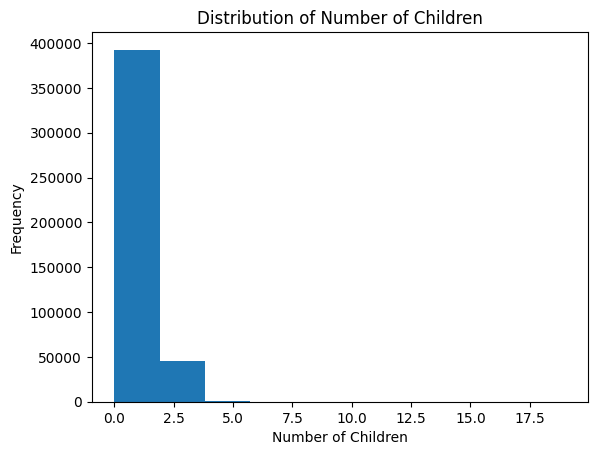

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


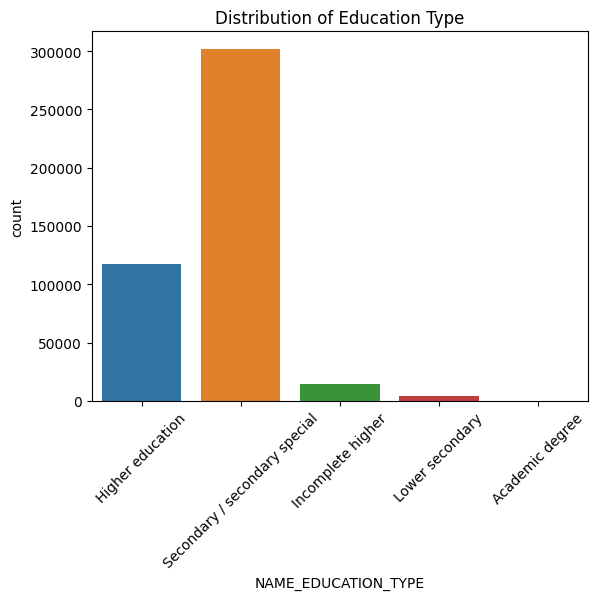

In [14]:
# Histogram for a numerical variable
plt.hist(application_record['CNT_CHILDREN'], bins=10)
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

# Count plot for a categorical variable
sns.countplot(x='NAME_EDUCATION_TYPE', data=application_record)
plt.title('Distribution of Education Type')
plt.xticks(rotation=45)
plt.show()


Most applicants have few or no children, which is a common demographic trend.

The count plot for NAME_EDUCATION_TYPE highlights the educational background of the applicants. It shows that the majority of applicants have a Secondary / secondary special education, followed by those with Higher education. This distribution can provide insights into the educational attainment levels of the applicant pool.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


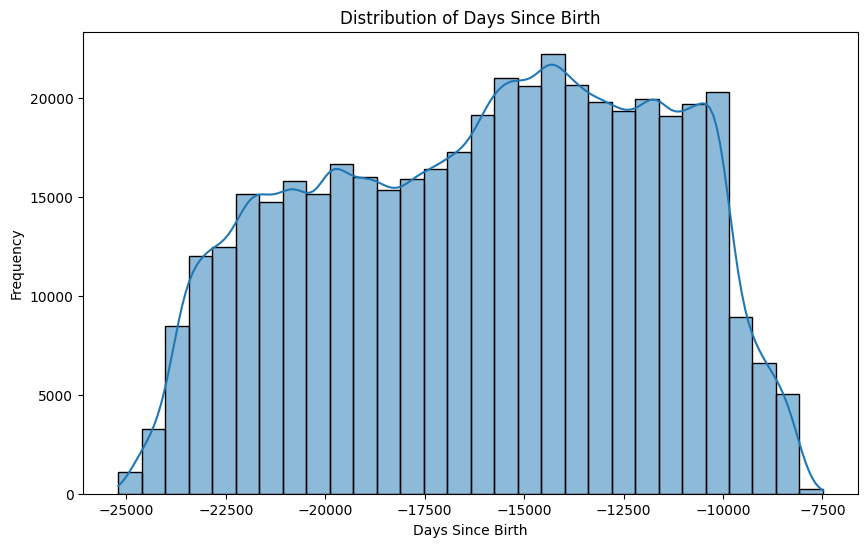

In [15]:
# Visualize the distribution of 'DAYS_BIRTH' in 'application_record' dataset
plt.figure(figsize=(10, 6))
sns.histplot(application_record['DAYS_BIRTH'], kde=True, bins=30)
plt.title('Distribution of Days Since Birth')
plt.xlabel('Days Since Birth')
plt.ylabel('Frequency')
plt.show()


The distribution of DAYS BIRTH was visualized, showing the age distribution of applicants in days. The KDE (Kernel Density Estimate) overlay on the histogram provides a smooth estimate of the distribution, indicating a fairly uniform distribution of ages among applicants, with slight skewness towards younger applicants.

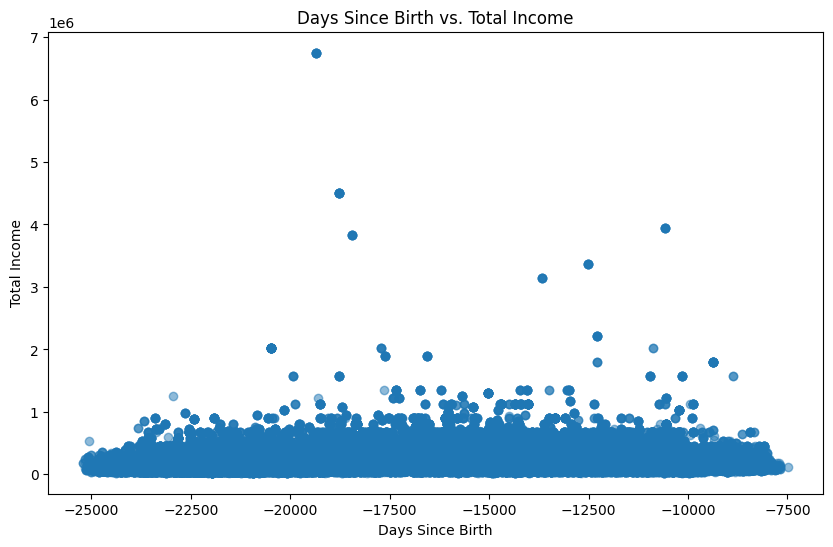

In [17]:
# Scatter plot to explore the relationship between 'DAYS_BIRTH' and 'AMT_INCOME_TOTAL' in 'application_record'
plt.figure(figsize=(10, 6))
plt.scatter(application_record['DAYS_BIRTH'], application_record['AMT_INCOME_TOTAL'], alpha=0.5)
plt.title('Days Since Birth vs. Total Income')
plt.xlabel('Days Since Birth')
plt.ylabel('Total Income')
plt.show()


the plot did not show a clear correlation between age and total income among applicants. This suggests that income levels may not be directly influenced by age, or that any such relationship is not linear or is obscured by other factors.

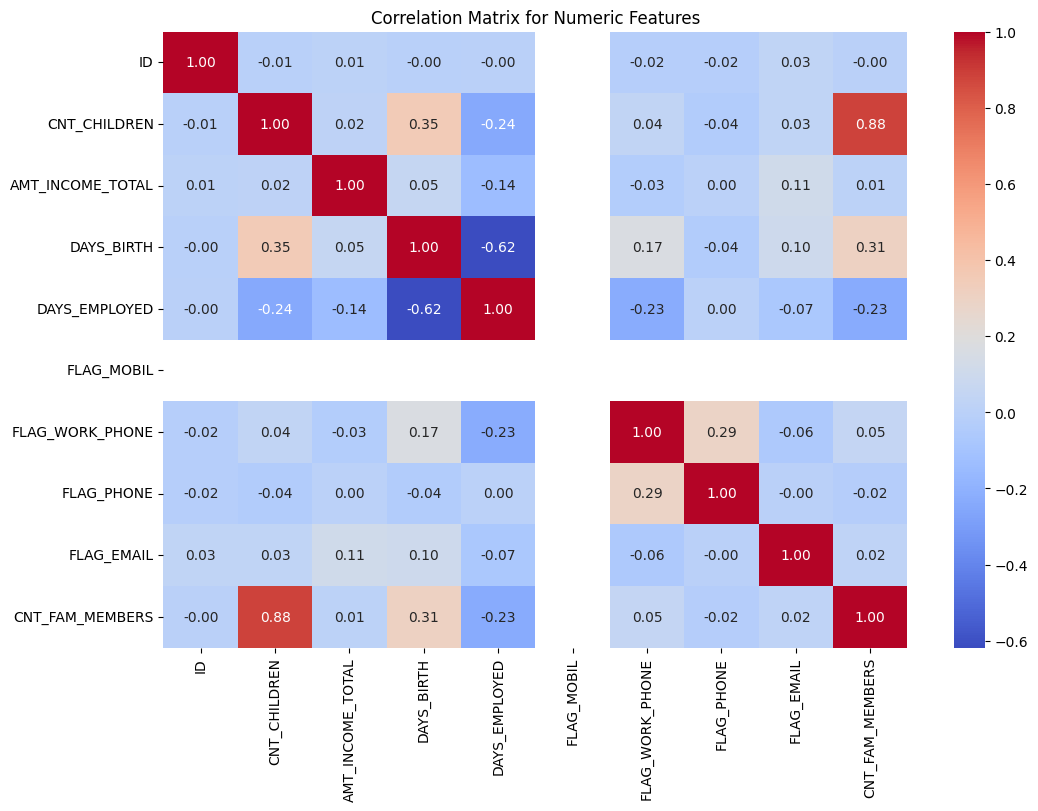

In [20]:
# Selecting only the numeric columns from 'application_record'
numeric_columns = application_record.select_dtypes(include=[np.number])

# Computing the correlation matrix for numeric columns only
corr_matrix_numeric = numeric_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_numeric, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()


The correlation matrix provided insights into the linear relationships between variables. A strong correlation between certain variables might indicate a dependency that could be explored further for feature engineering or for understanding the underlying dynamics of the data.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


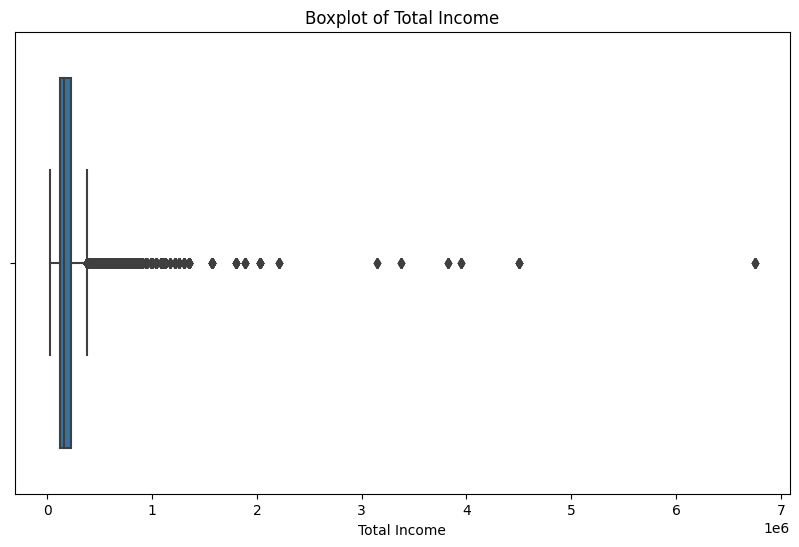

In [19]:
# Boxplot for 'AMT_INCOME_TOTAL' to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=application_record['AMT_INCOME_TOTAL'])
plt.title('Boxplot of Total Income')
plt.xlabel('Total Income')
plt.show()

# Handling outliers could involve removing them or applying transformations


The boxplot of AMT_INCOME_TOTAL highlighted the presence of outliers in total income, with some applicants having significantly higher incomes than the general population. These outliers can affect statistical analyses and model performance, so decisions about handling them (e.g., capping, transformation, or removal) are crucial.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


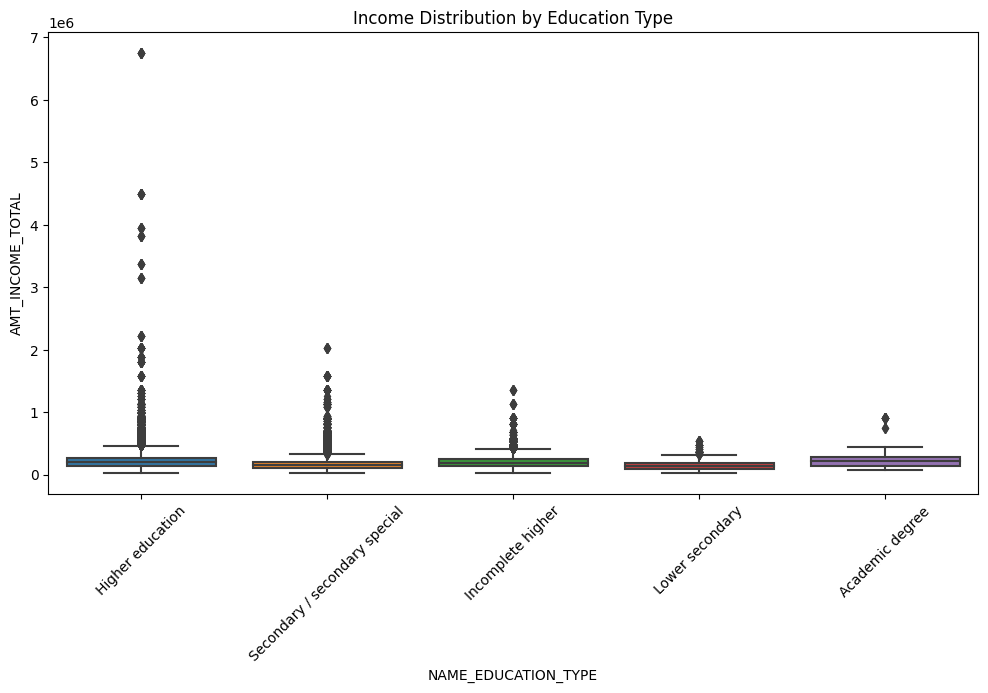

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', data=application_record)
plt.title('Income Distribution by Education Type')
plt.xticks(rotation=45)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


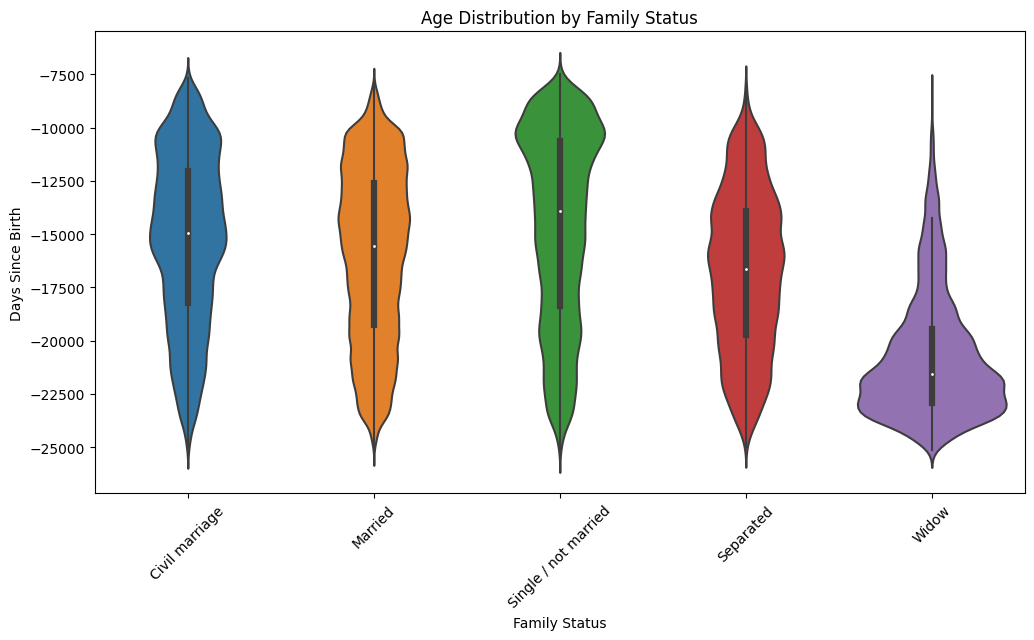

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='NAME_FAMILY_STATUS', y='DAYS_BIRTH', data=application_record)
plt.title('Age Distribution by Family Status')
plt.xticks(rotation=45)
plt.xlabel('Family Status')
plt.ylabel('Days Since Birth')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


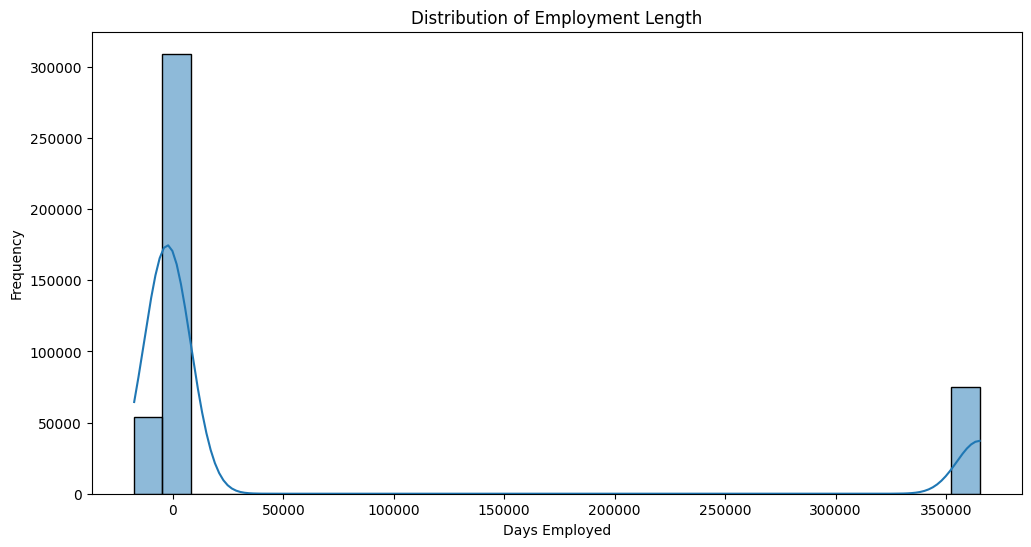

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(application_record['DAYS_EMPLOYED'], bins=30, kde=True)
plt.title('Distribution of Employment Length')
plt.xlabel('Days Employed')
plt.ylabel('Frequency')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

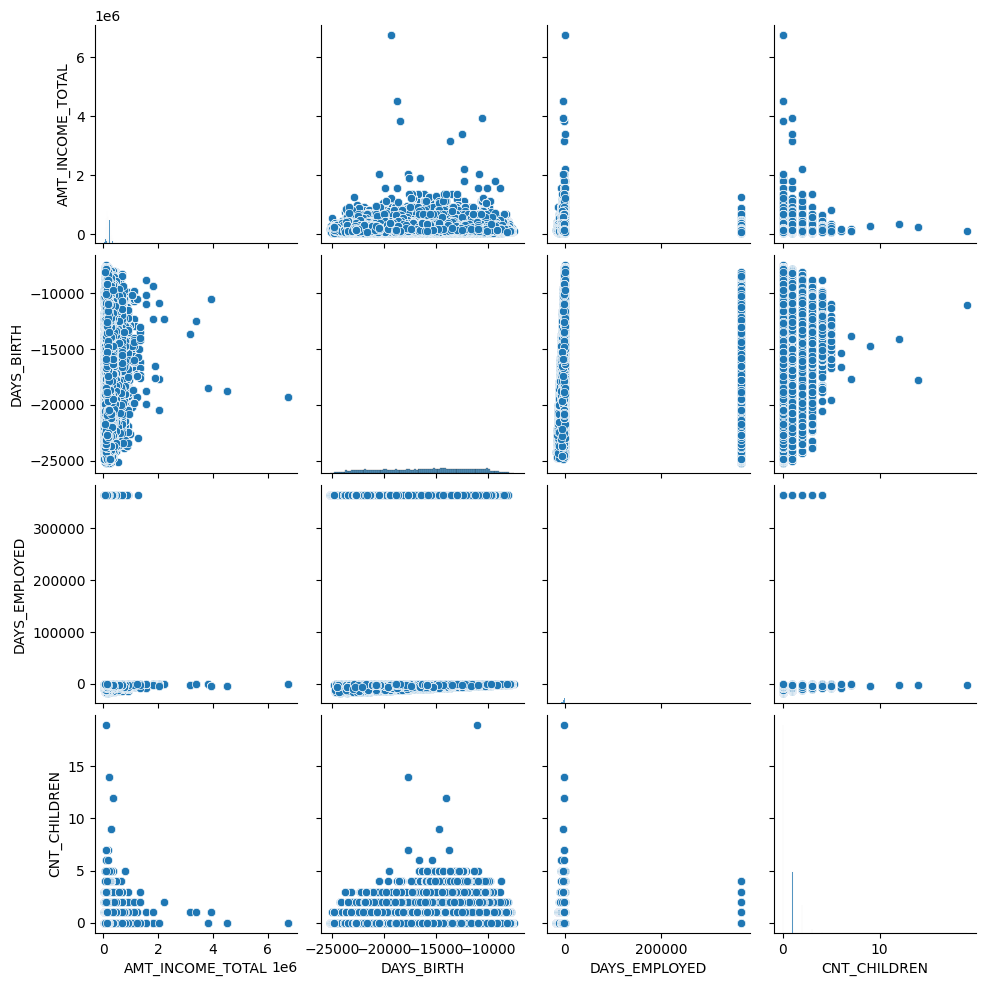

In [27]:
# Select a subset of columns for pairwise analysis
selected_columns = application_record[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN']]

# Pairplot
sns.pairplot(selected_columns)
plt.show()


1. Outliers in Income and Employment Length:

The presence of outliers in AMT_INCOME_TOTAL and DAYS_EMPLOYED is critical because outliers can have a significant impact on statistical analyses and predictive modeling. For example, extremely high incomes can skew mean values and affect correlations, while unusual employment lengths might indicate data entry errors or special cases like retirement, which need to be understood and treated correctly in the analysis.

2. No Clear Age to Income Relationship:

The lack of a visible pattern between DAYS_BIRTH and AMT_INCOME_TOTAL suggests that the applicant's age does not have a straightforward relationship with their income level. This is important for financial institutions to consider, as it may imply that age is not a strong predictor of income, and thus, may not be a reliable factor alone when assessing creditworthiness.